In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [225]:
df=pd.read_csv("train 2.csv")
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [226]:
df['date']=pd.to_datetime(df['date'])

In [227]:
df_1=df.groupby(['date','item'],as_index=False)['sales'].sum()
df_1.head()

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83


In [228]:
df_1 = df_1.sort_values('date')

In [229]:
ff1=df_1[df_1['item']==1]

In [230]:
ff1.head()

,date,item,sales
0,2013-01-01,1,133
50,2013-01-02,1,99
100,2013-01-03,1,127
150,2013-01-04,1,145
200,2013-01-05,1,149


In [231]:
ff1=ff1.set_index('date')
ff1.head()

,item,sales
date,,
2013-01-01,1,133
2013-01-02,1,99
2013-01-03,1,127
2013-01-04,1,145
2013-01-05,1,149


In [232]:
ff1.drop(columns=['item',],inplace=True)
ff1.head()

,sales
date,
2013-01-01,133
2013-01-02,99
2013-01-03,127
2013-01-04,145
2013-01-05,149


In [233]:
ff1['ThreeMonth']=ff1.rolling(window=90).sum()
ff1.head()

,sales,ThreeMonth
date,,
2013-01-01,133,NaN
2013-01-02,99,NaN
2013-01-03,127,NaN
2013-01-04,145,NaN
2013-01-05,149,NaN


In [234]:
ff1.dropna(inplace=True)
ff1.drop(columns=['sales'],inplace=True)
ff1.head()

,ThreeMonth
date,
2013-03-31,12847.0
2013-04-01,12848.0
2013-04-02,12936.0
2013-04-03,13019.0
2013-04-04,13103.0


<AxesSubplot:xlabel='date'>

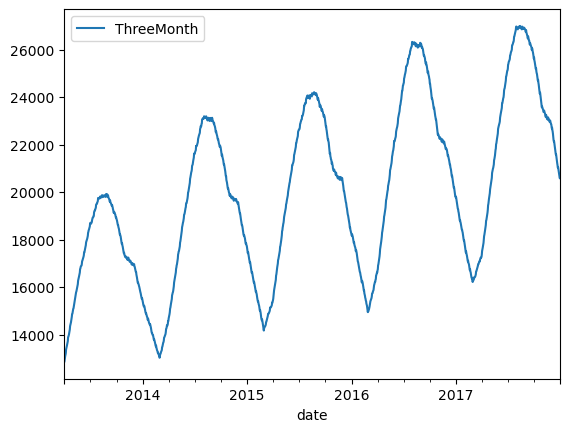

In [235]:
ff1.plot()

In [236]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [237]:
ff1.head()

,ThreeMonth
date,
2013-03-31,12847.0
2013-04-01,12848.0
2013-04-02,12936.0
2013-04-03,13019.0
2013-04-04,13103.0


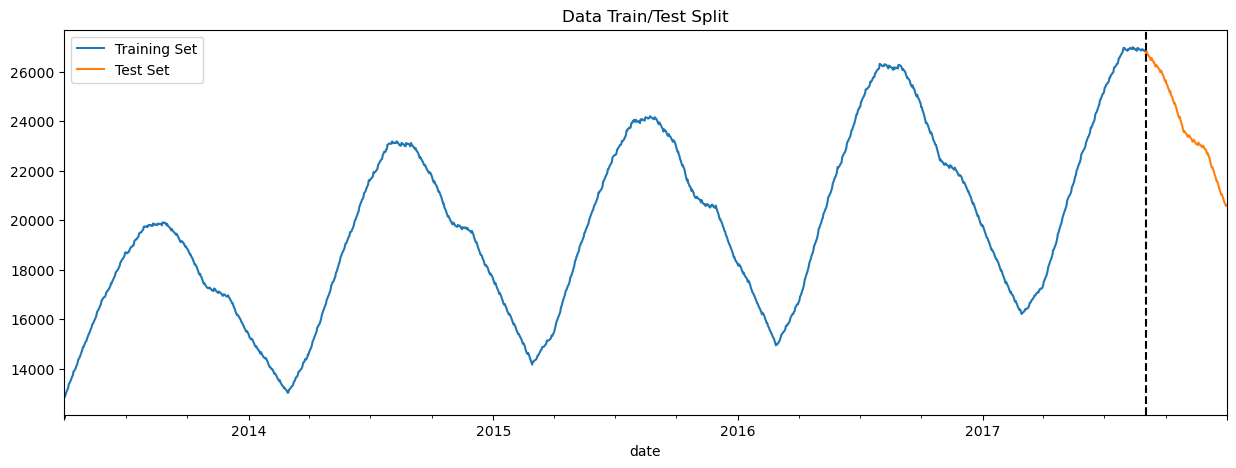

In [238]:
train = ff1.loc[ff1.index < '2017-09-01']
test = ff1.loc[ff1.index >= '2017-09-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2017-09-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [239]:
ff1['dayofweek'] = ff1.index.dayofweek
ff1['quarter'] = ff1.index.quarter
ff1['month'] = ff1.index.month
ff1['year'] = ff1.index.year
ff1['dayofyear'] = ff1.index.dayofyear
ff1['dayofmonth'] = ff1.index.day
ff1['weekofyear'] = ff1.index.isocalendar().week

In [240]:
ff1

,ThreeMonth,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2013-03-31,12847.0,6,1,3,2013,90,31,13
2013-04-01,12848.0,0,2,4,2013,91,1,14
2013-04-02,12936.0,1,2,4,2013,92,2,14
2013-04-03,13019.0,2,2,4,2013,93,3,14
2013-04-04,13103.0,3,2,4,2013,94,4,14
...,...,...,...,...,...,...,...,...
2017-12-27,20796.0,2,4,12,2017,361,27,52
2017-12-28,20704.0,3,4,12,2017,362,28,52
2017-12-29,20642.0,4,4,12,2017,363,29,52


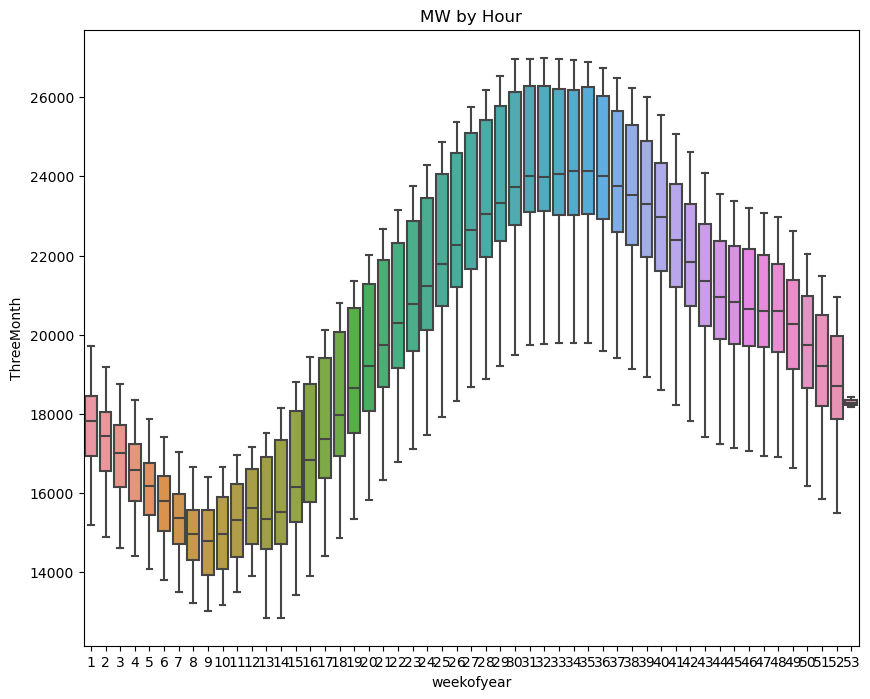

In [241]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=ff1, x='weekofyear', y='ThreeMonth')
ax.set_title('MW by Hour')
plt.show()

In [242]:
train.head()

,ThreeMonth
date,
2013-03-31,12847.0
2013-04-01,12848.0
2013-04-02,12936.0
2013-04-03,13019.0
2013-04-04,13103.0


In [243]:
train = ff1.loc[ff1.index < '2017-09-01']
test = ff1.loc[ff1.index >= '2017-09-01']

In [244]:
train.head()

,ThreeMonth,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2013-03-31,12847.0,6,1,3,2013,90,31,13
2013-04-01,12848.0,0,2,4,2013,91,1,14
2013-04-02,12936.0,1,2,4,2013,92,2,14
2013-04-03,13019.0,2,2,4,2013,93,3,14
2013-04-04,13103.0,3,2,4,2013,94,4,14


In [245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1615 entries, 2013-03-31 to 2017-08-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ThreeMonth  1615 non-null   float64
 1   dayofweek   1615 non-null   int64  
 2   quarter     1615 non-null   int64  
 3   month       1615 non-null   int64  
 4   year        1615 non-null   int64  
 5   dayofyear   1615 non-null   int64  
 6   dayofmonth  1615 non-null   int64  
 7   weekofyear  1615 non-null   UInt32 
dtypes: UInt32(1), float64(1), int64(6)
memory usage: 108.8 KB


In [246]:
X_train = train.drop(columns=['ThreeMonth','weekofyear'])
y_train = train['ThreeMonth']

X_test = test.drop(columns=['ThreeMonth','weekofyear'])
y_test = test['ThreeMonth']
print(train.shape)
print(test.shape)

(1615, 8)
(122, 8)


In [247]:
reg = XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[10:52:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:19818.08593	validation_1-rmse:23750.02138
[100]	validation_0-rmse:7359.15040	validation_1-rmse:9549.32824
[200]	validation_0-rmse:2781.23597	validation_1-rmse:4233.98740
[300]	validation_0-rmse:1101.07790	validation_1-rmse:2129.19681
[400]	validation_0-rmse:485.89927	validation_1-rmse:1047.41907
[500]	validation_0-rmse:259.81339	validation_1-rmse:628.00120
[600]	validation_0-rmse:169.60267	validation_1-rmse:437.27050
[700]	validation_0-rmse:131.62294	validation_1-rmse:357.72069
[800]	validation_0-rmse:113.05638	validation_1-rmse:323.23107
[900]	validation_0-rmse:102.87690	validation_1-rmse:307.75435
[999]	validation_0-rmse:94.92470	validation_1-rmse:301.11352


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

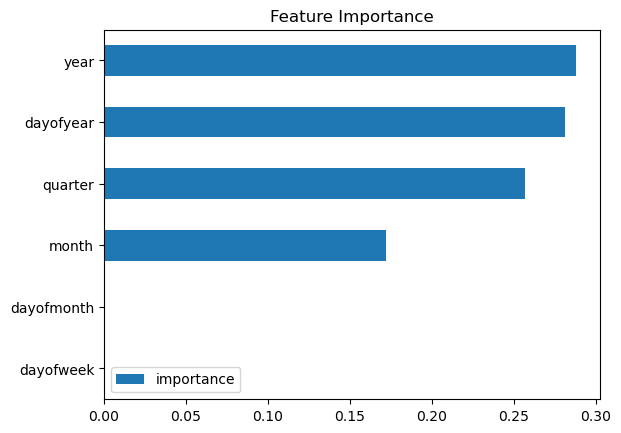

In [248]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [249]:
len(reg.predict(X_test))

122

C:\Users\scman\AppData\Local\Temp\ipykernel_8004\3136224032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


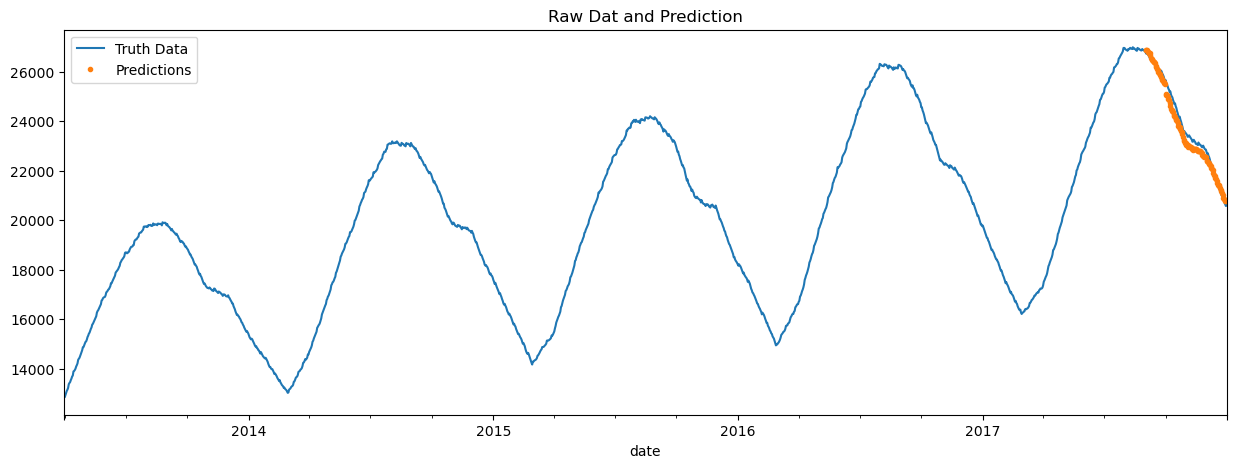

In [250]:
test['prediction'] = reg.predict(X_test)
ff1 = ff1.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = ff1[['ThreeMonth']].plot(figsize=(15, 5))
ff1['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [251]:
test.head()

,ThreeMonth,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction
date,,,,,,,,,
2017-09-01,26797.0,4,3,9,2017,244,1,35,26883.384766
2017-09-02,26739.0,5,3,9,2017,245,2,35,26883.062500
2017-09-03,26816.0,6,3,9,2017,246,3,35,26883.923828
2017-09-04,26729.0,0,3,9,2017,247,4,36,26811.349609
2017-09-05,26683.0,1,3,9,2017,248,5,36,26785.529297


In [253]:
score = np.sqrt(mean_squared_error(test['ThreeMonth'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 301.11


In [254]:
test['error'] = np.abs(test['ThreeMonth'] - test['prediction'])
test.head()

C:\Users\scman\AppData\Local\Temp\ipykernel_8004\1975439497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test['ThreeMonth'] - test['prediction'])


,ThreeMonth,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction,error
date,,,,,,,,,,
2017-09-01,26797.0,4,3,9,2017,244,1,35,26883.384766,86.384766
2017-09-02,26739.0,5,3,9,2017,245,2,35,26883.062500,144.062500
2017-09-03,26816.0,6,3,9,2017,246,3,35,26883.923828,67.923828
2017-09-04,26729.0,0,3,9,2017,247,4,36,26811.349609,82.349609
2017-09-05,26683.0,1,3,9,2017,248,5,36,26785.529297,102.529297


In [256]:
test.sort_values(by='error',ascending=False)

,ThreeMonth,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction,error
date,,,,,,,,,,
2017-10-08,25211.0,6,4,10,2017,281,8,40,24626.103516,584.896484
2017-10-09,25079.0,0,4,10,2017,282,9,41,24499.550781,579.449219
2017-10-01,25667.0,6,4,10,2017,274,1,39,25097.626953,569.373047
2017-10-15,24729.0,6,4,10,2017,288,15,41,24161.826172,567.173828
2017-10-10,25012.0,1,4,10,2017,283,10,41,24450.566406,561.433594
...,...,...,...,...,...,...,...,...,...,...
2017-12-19,21396.0,1,4,12,2017,353,19,51,21416.144531,20.144531
2017-09-11,26495.0,0,3,9,2017,254,11,37,26476.832031,18.167969
2017-09-12,26451.0,1,3,9,2017,255,12,37,26434.425781,16.574219
